## REFRACT HACKATHON EVENT
### October 5, 2022
#### GROUP 2
#### Amilia Christina Vagiona (JGU), David Moyano Palazuelo (CSIC), Ian Czarnowski (UNQ), Rubiel Vargas-Canas (UNICAUCA), Soroush Mozaffari (UNIPD)


Challenge description:
Try to generate a dataset of Tandem Repeat Proteins (TRP) which bind RNA/DNA

Strategy:
1. Create a dataset of proteins that are annotated as TRP
2. Create a dataset of DNA biding proteins
3. Create a dataset of RNA binding proteins
4. Look for overlapping between the TRPs and DNA/RNA binding proteins
5. Visualize the obtained data

In [1]:
# Essential modules are imported
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
%matplotlib inline

#### STEP 1. Create a dataset of proteins that are annotated as TRP
For this purpose, we decided to use RepeatsDB data
as one of the most trusted structurally annotated databases of TRPs

In [2]:
trp_df = pd.read_json("../data/input/RepeatsDB-table.json")
trp_df

,start,end,type,class,topology,fold,clan,class_topology,class_topology_fold,class_topology_fold_clan,pdb_id,pdb_chain,repeatsdb_id,origin,reviewed,annotator,region_id,region_units_num,region_average_unit_length
0,22,60,unit,3,3,0,0,3.3,3.3.0,3.3.0.0,1a17,A,1a17A,Reviewed,True,['0000-0002-8215-6716 2017-08-01 03'],1a17A_22_128,3,35.666667
1,61,94,unit,3,3,0,0,3.3,3.3.0,3.3.0.0,1a17,A,1a17A,Reviewed,True,['0000-0002-8215-6716 2017-08-01 03'],1a17A_22_128,3,35.666667
2,95,128,unit,3,3,0,0,3.3,3.3.0,3.3.0.0,1a17,A,1a17A,Reviewed,True,['0000-0002-8215-6716 2017-08-01 03'],1a17A_22_128,3,35.666667
3,112,159,unit,3,3,0,0,3.3,3.3.0,3.3.0.0,1a38,A,1a38A,Reviewed,True,['0000-0001-5668-768X 2022-05-12 02'],1a38A_2_201,4,42.250000
4,34,111,unit,3,3,0,0,3.3,3.3.0,3.3.0.0,1a38,A,1a38A,Reviewed,True,['0000-0001-5668-768X 2022-05-12 02'],1a38A_2_201,4,42.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56642,149,183,unit,3,3,0,,3.3,3.3.0,3.3.0,7w3k,a,7w3ka,Reviewed,True,['0000-0002-9460-5638 2022-08-17 02'],7w3ka_17_228,5,38.000000
56643,88,126,unit,3,3,0,,3.3,3.3.0,3.3.0,7w3k,a,7w3ka,Reviewed,True,['0000-0002-9460-5638 2022-08-17 02'],7w3ka_17_228,5,38.000000
56644,50,87,unit,3,3,0,,3.3,3.3.0,3.3.0,7w3k,a,7w3ka,Reviewed,True,['0000-0002-9460-5638 2022-08-17 02'],7w3ka_17_228,5,38.000000
56645,17,49,unit,3,3,0,,3.3,3.3.0,3.3.0,7w3k,a,7w3ka,Reviewed,True,['0000-0002-9460-5638 2022-08-17 02'],7w3ka_17_228,5,38.000000


The aforementioned database was downloaded as a json file and converted to a dataframe
It contained 56647 entries, each representing either a repeat unit or an insertion

In [3]:
trp_pdb_list = trp_df["pdb_id"].apply(lambda x: str(x.upper())).unique().tolist()
trp_pdb_num = len(trp_pdb_list)
print(f"Number of unique PDB ids that contain tandem repeats: {trp_pdb_num}")

Number of unique PDB ids that contain tandem repeats: 3109


The "pdb_id" column in trp_df was selected
Unique values were selected and added to a list
Overall, 3109 unique pdb id of TRPs was obtained

#### STEP 2. Create a dataset of DNA biding proteins

As the next step, a dataset of DNA binding proteins for Homo Sapience species was obtained from Uniprot
With the help of their mapping tool, all the Uniprot ids were mapped to their associated pdb ids

In [4]:
dna_df = pd.read_table("../data/input/uniprot-dna.tsv")
dna_df.drop_duplicates(inplace=True)
dna_df

,From,To
0,Q9HCU5,5TF2
1,Q15906,5FUG
2,P53539,5VPA
3,P53539,5VPB
4,P53539,5VPC
...,...,...
7338,O00571,5E7I
7339,O00571,5E7J
7340,O00571,5E7M
7341,O00571,6CZ5


The mapped dataset was downloaded as a tsv file and converted to a dataframe
It contained 7343 entries of "UNIPROT_ID - PDB_ID" that bind DNA in humans

In [5]:
dna_pdb_list = dna_df["To"].apply(lambda x: str(x.upper())).unique().tolist()
dna_uniprot_list = dna_df["From"].apply(lambda x: str(x.upper())).unique().tolist()

dna_pdb_num = len(dna_pdb_list)
dna_uni_num = len(dna_uniprot_list)

print(f"Number of unique PDB ids that bind DNA: {dna_pdb_num}")
print(f"Number of unique UNIPROT ids that bind DNA: {dna_uni_num}")

Number of unique PDB ids that bind DNA: 5718
Number of unique UNIPROT ids that bind DNA: 514


#### STEP 3. Create a dataset of RNA binding proteins
The same procedure as STEP 2 was carried out for RNA binding proteins

In [6]:
rna_df = pd.read_table("../data/input/uniprot_rna.tsv")
rna_df.drop_duplicates(inplace=True)
rna_df

,From,To
0,P04792,2N3J
1,P04792,3Q9P
2,P04792,3Q9Q
3,P04792,4MJH
4,P04792,6DV5
...,...,...
13177,O00571,5E7I
13178,O00571,5E7J
13179,O00571,5E7M
13180,O00571,6CZ5


The dataset contained 13182 entries of "UNIPROT_ID - PDB_ID" that bind RNA in humans

In [7]:
rna_pdb_list = rna_df["To"].apply(lambda x: str(x.upper())).unique().tolist()
rna_uniprot_list = rna_df["From"].apply(lambda x: str(x.upper())).unique().tolist()

rna_pdb_num = len(rna_pdb_list)
rna_uni_num = len(rna_uniprot_list)

print(f"Number of unique PDB ids that bind RNA: {rna_pdb_num}")
print(f"Number of unique UNIPROT ids that bind RNA: {rna_uni_num}")

Number of unique PDB ids that bind RNA: 6511
Number of unique UNIPROT ids that bind RNA: 919


In [8]:
not_trp_both = [pdb_id for pdb_id in rna_pdb_list if pdb_id in dna_pdb_list and pdb_id not in trp_pdb_list]
not_trp_both_num = len(not_trp_both)
print(f"Number of PDB ids that both bind DNA and RNA but are not TRPs: {not_trp_both_num}")

Number of PDB ids that both bind DNA and RNA but are not TRPs: 1395


#### STEP 4. Look for overlapping between the TRPs and DNA/RNA binding proteins

First, different lists of pdb ids are created based on overlaping between RepeatsDB and Uniprot datasets

In [9]:
# List of trp pdbs that bind DNA/RNA or both
trp_dna_pdbs = [pdb_id for pdb_id in trp_pdb_list if pdb_id in dna_pdb_list]
trp_rna_pdbs = [pdb_id for pdb_id in trp_pdb_list if pdb_id in rna_pdb_list]
trp_both_pdbs = [pdb_id for pdb_id in trp_pdb_list if pdb_id in dna_pdb_list and pdb_id in rna_pdb_list]

# List of trp pdbs that exclusively bind either DNA or RNA
trp_exc_dna_pdbs = [pdb_id for pdb_id in trp_pdb_list if pdb_id in dna_pdb_list and pdb_id not in rna_pdb_list]
trp_exc_rna_pdbs = [pdb_id for pdb_id in trp_pdb_list if pdb_id in rna_pdb_list and pdb_id not in dna_pdb_list]

Next, datasets are filtered based on the created pdb lists

In [10]:
# Datasets of repeat containing entries that bind DNA/RNA (containing overlaps)
trp_dna_df = dna_df[dna_df["To"].isin(trp_dna_pdbs)].rename({"From": "Uniprot", "To": "PDB"}, axis=1)
trp_rna_df = rna_df[rna_df["To"].isin(trp_rna_pdbs)].rename({"From": "Uniprot", "To": "PDB"}, axis=1)
trp_dna_or_rna_df = pd.concat([trp_rna_df, trp_dna_df]).drop_duplicates()
trp_dna_or_rna_df.rename({"From": "Uniprot", "To": "PDB"}, axis=1, inplace=True)
# For extracting data on repeat containing entries that bind both DNA & RNA,
# PDB ids are searched against both RNA and DNA datasets
trp_both_df1 = dna_df[dna_df["To"].isin(trp_both_pdbs)]
trp_both_df2 = rna_df[rna_df["To"].isin(trp_both_pdbs)]
# Next, the obtained entries are concatenated and redundancies are removed
trp_both_df = pd.concat([trp_both_df1, trp_both_df2]).drop_duplicates()
trp_both_df.rename({"From": "Uniprot", "To": "PDB"}, axis=1, inplace=True)
# Datasets of repeat containing entries that exclusively bind either DNA or RNA
trp_exc_dna_df = dna_df[dna_df["To"].isin(trp_exc_dna_pdbs)].rename({"From": "Uniprot", "To": "PDB"}, axis=1)
trp_exc_rna_df = rna_df[rna_df["To"].isin(trp_exc_rna_pdbs)].rename({"From": "Uniprot", "To": "PDB"}, axis=1)

#### Summary of repeat-containing PDBs

In [11]:
trp_dna_num = len(trp_dna_df['PDB'].unique())
trp_rna_num = len(trp_rna_df['PDB'].unique())
trp_both_num = len(trp_both_df['PDB'].unique())
trp_dna_or_rna_num = len(trp_dna_or_rna_df['PDB'].unique())
trp_exc_dna_num = len(trp_exc_dna_df['PDB'].unique())
trp_exc_rna_num = len(trp_exc_rna_df['PDB'].unique())
trp_not_both = trp_pdb_num - (trp_dna_num + trp_rna_num)

print(f"Number of repeat-containing PDBs that bind DNA: {trp_dna_num}")
print(f"Number of repeat-containing PDBs that bind RNA: {trp_rna_num}")
print(f"Number of repeat-containing PDBs that only bind DNA: {trp_exc_dna_num}")
print(f"Number of repeat-containing PDBs that only bind RNA: {trp_exc_rna_num}")
print(f"Number of repeat-containing PDBs that bind DNA and RNA: {trp_both_num}")
print(f"Number of repeat-containing PDBs that bind DNA or RNA: {trp_dna_or_rna_num}")
print(f"Number of repeat-containing PDBs that neither bind RNA or DNA: {trp_not_both}")

Number of repeat-containing PDBs that bind DNA: 117
Number of repeat-containing PDBs that bind RNA: 379
Number of repeat-containing PDBs that only bind DNA: 53
Number of repeat-containing PDBs that only bind RNA: 315
Number of repeat-containing PDBs that bind DNA and RNA: 64
Number of repeat-containing PDBs that bind DNA or RNA: 432
Number of repeat-containing PDBs that neither bind RNA or DNA: 2613


#### Summary of not-repeat-containing PDBs

In [12]:
not_trp_dna = dna_pdb_num - trp_dna_num
not_trp_rna = rna_pdb_num - trp_rna_num

print(f"Number of not-repeat-containing PDBs that bind DNA in Uniprot: {not_trp_dna}")
print(f"Number of not-repeat-containing PDBs that bind RNA in Uniprot: {not_trp_rna}")
print(f"Number of not-repeat-containing PDBs that bind both DNA and RNA: {not_trp_both_num}")

Number of not-repeat-containing PDBs that bind DNA in Uniprot: 5601
Number of not-repeat-containing PDBs that bind RNA in Uniprot: 6132
Number of not-repeat-containing PDBs that bind both DNA and RNA: 1395


The obtained datasets are saved as csv files

In [13]:
# TRPs that bind DNA
trp_dna_df .to_csv("../data/output/trp_dna.csv")
# TRPs that bind RNA
trp_rna_df.to_csv("../data/output/trp_rna.csv")
# TRPs that bind DNA and RNA
trp_both_df.to_csv("../data/output/trp_dna_and_rna.csv")
# TRPs that bind DNA or RNA
trp_dna_or_rna_df.to_csv("../data/output/trp_dna_or_rna.csv")
# TRPs that only bind DNA
trp_exc_dna_df.to_csv("../data/output/trp_exc_dna.csv")
# TRPs that only bind RNA
trp_exc_rna_df.to_csv("../data/output/trp_exc_rna.csv")

#### STEP 5. Visualize the obtained data

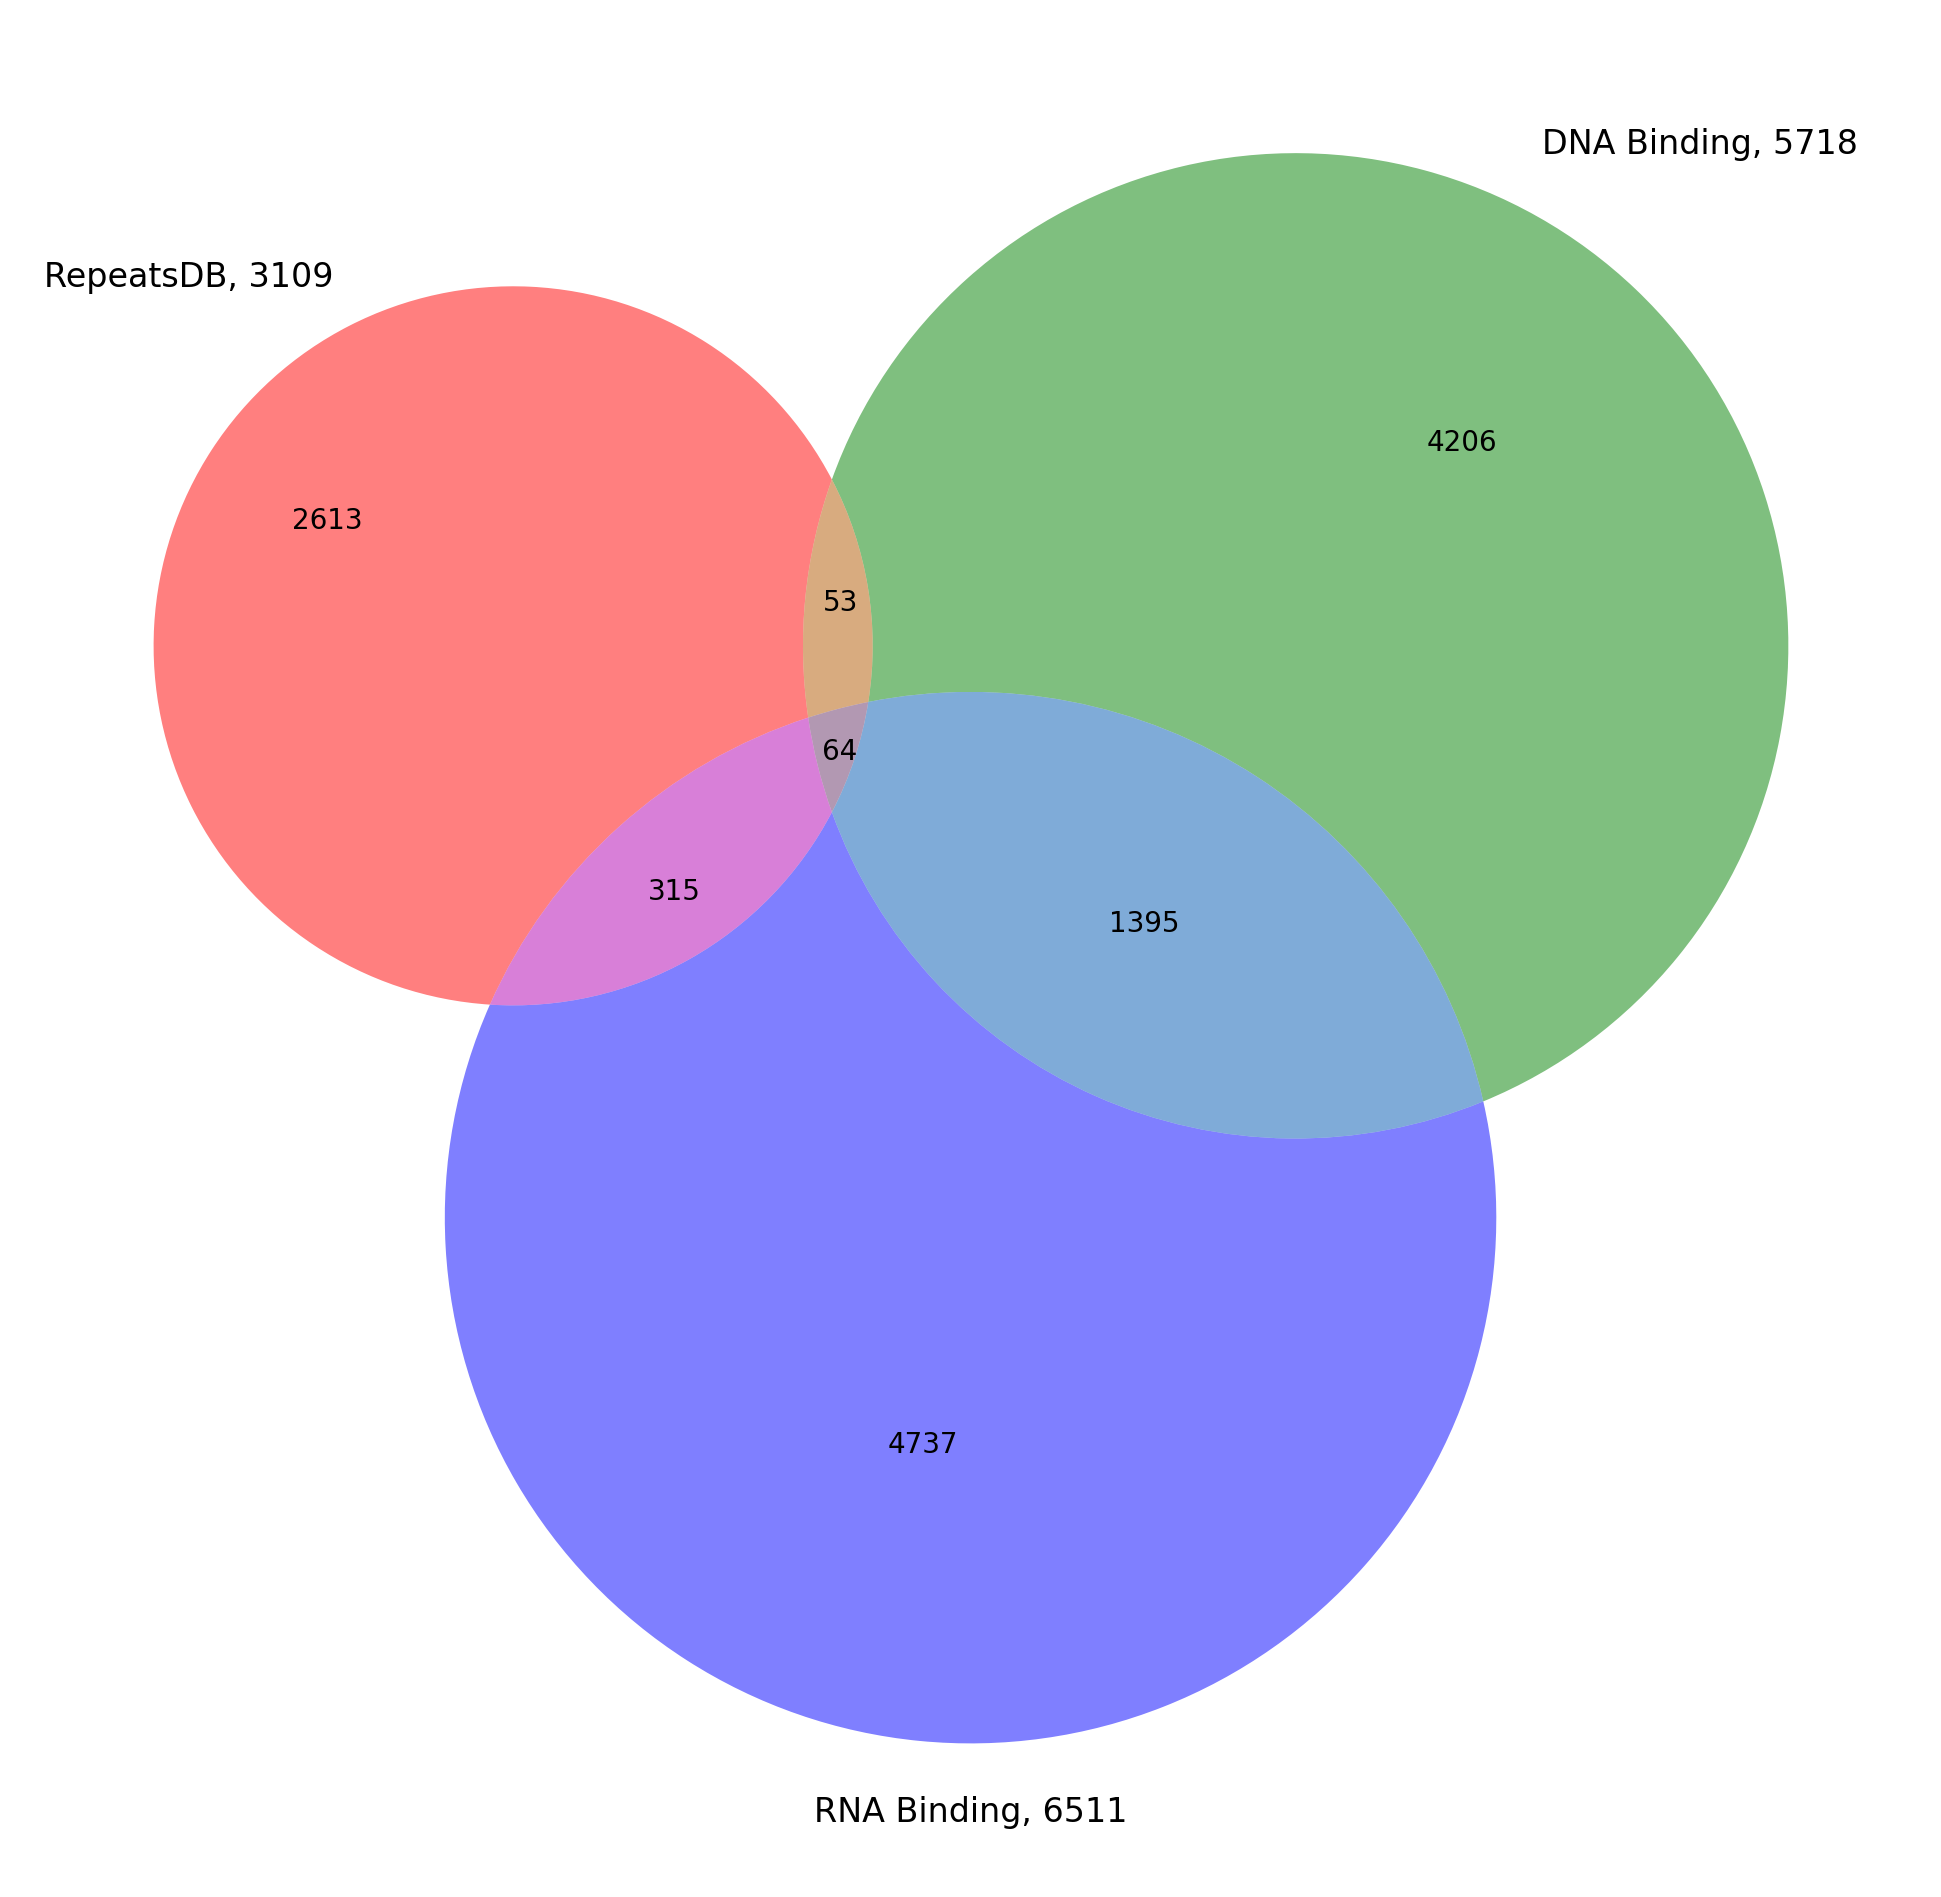

In [14]:
plt.figure(figsize=(10, 10), dpi=200)
venn3(subsets = (trp_not_both, (not_trp_dna - not_trp_both_num), trp_exc_dna_num, (not_trp_rna - not_trp_both_num), trp_exc_rna_num, not_trp_both_num, trp_both_num), set_labels = (f"RepeatsDB, {trp_pdb_num}", f"DNA Binding, {dna_pdb_num}", f"RNA Binding, {rna_pdb_num}"), alpha = 0.5)
plt.tight_layout()
plt.savefig("../data/output/Venn.png", format="png")
plt.show()